
# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [1]:
# Импортируем библиотеку padnas
import pandas as pd

In [2]:
# Запишем датасет в переменную data
data = pd.read_excel('/content/data.xlsx')

In [3]:
# Посмотрим на данные
data

,Номер заказа,Канал продаж,Продуктовый сегмент,Менеджер,Название заказа,Продавец,Город,"Продажи факт, тыс.руб","Продажи план, тыс.руб",Дата сделки,Дата оплаты,Дней между сделкой и оплатой,Статус
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25,52,Закрыто
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05,15,Закрыто
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,,В процессе
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,2020-03-04,1,Закрыто
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,2020-05-15,87,Закрыто
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,7168,Рекомендация,Другое,М. Баили,"SEITY Свет (ZHONGSHAN) CO., LTD.",IMG Светning,Волгоград,0,500,2020-01-28,NaT,,Потерянно
112,7194,Рекомендация,Другое,М. Баили,Kapego,IMG Светning,Волгоград,2000,500,2020-01-25,2020-02-06,13,Закрыто
113,7188,Рекомендация,Другое,М. Баили,"SEITY Свет (ZHONGSHAN) CO., LTD.",IMG Светning,Волгоград,1000,500,2020-01-28,2020-02-05,9,Закрыто
114,7441,Рекомендация,Другое,А. Перри,Одеяла,My cargo,Тула,450,500,2020-02-19,2020-02-23,5,Закрыто


In [4]:
# Посмотрим на размер датасета
data.shape

(116, 13)

In [5]:
# Посмотрим на основную информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 non-null    datetime64[ns]
 10  Дата оплаты                   93 non-null     datetime64[ns]
 11  Дней между сделкой и оплатой  11

# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [6]:
# Заменим название столбцов
new_columns = {
    'Номер заказа': 'order_id',
    'Канал продаж': 'sales_channel',
    'Продуктовый сегмент': 'product_segment',
    'Менеджер': 'manager',
    'Название заказа': 'order_name',
    'Продавец': 'seller',
    'Город': 'city',
    'Продажи факт, тыс.руб': 'sales_fact_k_rub',
    'Продажи план, тыс.руб': 'sales_plan_k_rub',
    'Дата сделки': 'deal_date',
    'Дата оплаты': 'payment_date',
    'Дней между сделкой и оплатой': 'days_deal_payment',
    'Статус': 'status'
}
data = data.rename(columns=new_columns)

In [7]:
# Выведим список названий столбцов
data.columns

Index(['order_id', 'sales_channel', 'product_segment', 'manager', 'order_name',
       'seller', 'city', 'sales_fact_k_rub', 'sales_plan_k_rub', 'deal_date',
       'payment_date', 'days_deal_payment', 'status'],
      dtype='object')

In [8]:
print(data.head())

   order_id    sales_channel         product_segment   manager  \
0      7290     Рекомендация      Ткань и аксессуары  С. Милер   
1      7291     Рекомендация      Ткань и аксессуары  С. Милер   
2      7436     Рекомендация      Ткань и аксессуары  С. Милер   
3      7484     Рекомендация      Ткань и аксессуары  С. Милер   
4      7040  Холодный звонок  Электронные устройства  М. Баили   

               order_name    seller             city  sales_fact_k_rub  \
0                NAM SUNG  Айсберг   Санкт-Петербург               300   
1                CP Ткань  Айсберг   Санкт-Петербург               450   
2          UNIZIN COMPANY  Айсберг   Санкт-Петербург                 0   
3                NAM SUNG  Айсберг   Санкт-Петербург               500   
4  Электронные устройства  Alen.com     Магнитогорск               100   

   sales_plan_k_rub  deal_date payment_date days_deal_payment      status  
0               500 2020-02-03   2020-03-25                52     Закрыто  
1     

In [9]:
data['days_deal_payment'] = pd.to_numeric(data['days_deal_payment'],errors='coerce',downcast='integer')
data['days_deal_payment'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 116 entries, 0 to 115
Series name: days_deal_payment
Non-Null Count  Dtype  
--------------  -----  
93 non-null     float64
dtypes: float64(1)
memory usage: 1.0 KB


In [10]:
print('Количество строк с пропущенными значениями в столбце "days_deal_payment": ',data[data['days_deal_payment'].isna()].shape[0],'\n')
display(data[data['days_deal_payment'].isna()])

Количество строк с пропущенными значениями в столбце "days_deal_payment":  23 



,order_id,sales_channel,product_segment,manager,order_name,seller,city,sales_fact_k_rub,sales_plan_k_rub,deal_date,payment_date,days_deal_payment,status
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,NaT,NaN,В процессе
5,7166,Контекстная реклама,Электронные устройства,Т. Ли,USB,Aladdin,Оренбург,0,1000,2020-06-18,NaT,NaN,В процессе
6,7185,Контекстная реклама,Электронные устройства,Т. Ли,USB,Aladdin,Оренбург,0,1000,2019-07-03,NaT,NaN,Потерянно
9,7210,Холодный звонок,Ткань и аксессуары,А. Фостер,Ткань,A-Fashion,Оренбург,0,500,2019-06-03,NaT,NaN,Потерянно
14,7375,Рекомендация,Игрушки,Т. Ли,Winnprime,Vegas Glass,Омск,0,500,2020-06-15,NaT,NaN,В процессе
21,7409,Рекомендация,Ткань и аксессуары,С. Милер,"MATERIAL DISCOVERY CO.,LTD",Big sofa,Москва,0,500,2020-06-27,NaT,NaN,В процессе
22,7507,Рекомендация,Ткань и аксессуары,С. Милер,"MATERIAL DISCOVERY CO.,LTD",Big sofa,Москва,0,500,2020-06-04,NaT,NaN,В процессе
25,7226,Контекстная реклама,Охота и рыбалка,М. Баили,JAXON Sp. z o.o.,Hunt IT,Ярославль,0,500,2020-01-02,NaT,NaN,Потерянно
40,7059,Почта,Одежда,М. Баили,Макет с динозаврами,Leader,Липецк,0,500,2020-03-20,NaT,NaN,Потерянно
41,7482,Холодный звонок,Ткань и аксессуары,М. Баили,Домашний текстиль,LIDA,Стоврополь,0,500,2020-06-20,NaT,NaN,В процессе


Отсутствие данных в в столбце `payment_date` связано с тем, что заказ либо был __утерян__ или отменен, либо находиться __в процессе__ оформления. Пропуски в столбце `days_deal_payment` можно заменить нулями и привести столбце к целочисленному типу данных, а  в столбце `payment_date` заполнить пропущенные значения.

In [11]:
data['days_deal_payment'].fillna(0,inplace=True)

/tmp/ipython-input-1960076030.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['days_deal_payment'].fillna(0,inplace=True)


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           116 non-null    int64         
 1   sales_channel      116 non-null    object        
 2   product_segment    116 non-null    object        
 3   manager            116 non-null    object        
 4   order_name         116 non-null    object        
 5   seller             116 non-null    object        
 6   city               116 non-null    object        
 7   sales_fact_k_rub   116 non-null    int64         
 8   sales_plan_k_rub   116 non-null    int64         
 9   deal_date          116 non-null    datetime64[ns]
 10  payment_date       93 non-null     datetime64[ns]
 11  days_deal_payment  116 non-null    float64       
 12  status             116 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(7)
memory usag

In [13]:
data['days_deal_payment'] = pd.to_numeric(data['days_deal_payment'],downcast='integer')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           116 non-null    int64         
 1   sales_channel      116 non-null    object        
 2   product_segment    116 non-null    object        
 3   manager            116 non-null    object        
 4   order_name         116 non-null    object        
 5   seller             116 non-null    object        
 6   city               116 non-null    object        
 7   sales_fact_k_rub   116 non-null    int64         
 8   sales_plan_k_rub   116 non-null    int64         
 9   deal_date          116 non-null    datetime64[ns]
 10  payment_date       93 non-null     datetime64[ns]
 11  days_deal_payment  116 non-null    int16         
 12  status             116 non-null    object        
dtypes: datetime64[ns](2), int16(1), int64(3), object(7)
memory usage:

In [15]:
print(data[data['payment_date'].isna()].shape[0])

data['payment_date'] = data['payment_date'].fillna('нет даты')

23


In [16]:
print( f'Доля строк с пропущенными значениям состовляет:',round(data[data['payment_date']=='нет даты'].shape[0]/data.shape[0]*100,2),
      f'\nВсего строк с пропущенными значениями {data[data['payment_date']=='нет даты'].shape[0]}')

Доля строк с пропущенными значениям состовляет: 19.83 
Всего строк с пропущенными значениями 23


Количество строк с пропущенными значениями состовляет почти 20 %. Их удаление или сохранение будет зависить от поставленных задач.

In [17]:
# Создадим отчищенный датасет от нулевых фактических продаж
filtered_data = data[(data['days_deal_payment']!=0)&(data['sales_fact_k_rub']!=0)].reset_index(drop=True)
filtered_data

,order_id,sales_channel,product_segment,manager,order_name,seller,city,sales_fact_k_rub,sales_plan_k_rub,deal_date,payment_date,days_deal_payment,status
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25 00:00:00,52,Закрыто
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05 00:00:00,15,Закрыто
2,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,2020-03-04 00:00:00,1,Закрыто
3,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,2020-05-15 00:00:00,87,Закрыто
4,7047,Контекстная реклама,Электронные устройства,Т. Ли,USB Beijing,Aladdin,Оренбург,250,1000,2020-01-04,2020-01-10 00:00:00,7,Закрыто
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,7164,Рекомендация,Другое,М. Баили,Светодиодные светильники для наружного архитек...,IMG Светning,Волгоград,1250,500,2020-01-27,2020-01-30 00:00:00,4,Закрыто
89,7194,Рекомендация,Другое,М. Баили,Kapego,IMG Светning,Волгоград,2000,500,2020-01-25,2020-02-06 00:00:00,13,Закрыто
90,7188,Рекомендация,Другое,М. Баили,"SEITY Свет (ZHONGSHAN) CO., LTD.",IMG Светning,Волгоград,1000,500,2020-01-28,2020-02-05 00:00:00,9,Закрыто
91,7441,Рекомендация,Другое,А. Перри,Одеяла,My cargo,Тула,450,500,2020-02-19,2020-02-23 00:00:00,5,Закрыто


In [18]:
# Посмотрим на общие продажи по городам
city_sales = filtered_data.pivot_table(values='sales_fact_k_rub',index='city',aggfunc='sum').sort_values(by = 'sales_fact_k_rub',ascending=False)
city_sales

,sales_fact_k_rub
city,
Челябинск,8700
Казань,8040
Магнитогорск,7680
Сочи,6950
Новосибирск,5725
Самара,5574
Уфа,4350
Волгоград,4250
Москва,3717


In [19]:
filtered_data['sales_fact_k_rub'] = filtered_data['sales_fact_k_rub']*1000
filtered_data['sales_plan_k_rub'] = filtered_data['sales_plan_k_rub']*1000

In [20]:
filtered_data = filtered_data.rename(columns={'sales_fact_k_rub':'sales_fact_rub','sales_plan_k_rub':'sales_plan_rub'})
filtered_data

,order_id,sales_channel,product_segment,manager,order_name,seller,city,sales_fact_rub,sales_plan_rub,deal_date,payment_date,days_deal_payment,status
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300000,500000,2020-02-03,2020-03-25 00:00:00,52,Закрыто
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450000,500000,2020-03-22,2020-04-05 00:00:00,15,Закрыто
2,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500000,500000,2020-03-04,2020-03-04 00:00:00,1,Закрыто
3,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100000,1000000,2020-02-19,2020-05-15 00:00:00,87,Закрыто
4,7047,Контекстная реклама,Электронные устройства,Т. Ли,USB Beijing,Aladdin,Оренбург,250000,1000000,2020-01-04,2020-01-10 00:00:00,7,Закрыто
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,7164,Рекомендация,Другое,М. Баили,Светодиодные светильники для наружного архитек...,IMG Светning,Волгоград,1250000,500000,2020-01-27,2020-01-30 00:00:00,4,Закрыто
89,7194,Рекомендация,Другое,М. Баили,Kapego,IMG Светning,Волгоград,2000000,500000,2020-01-25,2020-02-06 00:00:00,13,Закрыто
90,7188,Рекомендация,Другое,М. Баили,"SEITY Свет (ZHONGSHAN) CO., LTD.",IMG Светning,Волгоград,1000000,500000,2020-01-28,2020-02-05 00:00:00,9,Закрыто
91,7441,Рекомендация,Другое,А. Перри,Одеяла,My cargo,Тула,450000,500000,2020-02-19,2020-02-23 00:00:00,5,Закрыто


# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды? Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле.

Какова география продаж, какие регионы самые доходные?

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

## Анализ выполнения плана продаж менеджерами


Рассчитаем фактические и плановые продажи для каждого менеджера и определим процент выполнения плана. Выделим лучших и худших менеджеров.


In [21]:
manager_performance = filtered_data.groupby('manager').agg(
    sales_fact_rub=('sales_fact_rub', 'sum'),
    sales_plan_rub=('sales_plan_rub', 'sum')
).reset_index()

manager_performance['plan_fulfillment_percentage'] = (manager_performance['sales_fact_rub'] / manager_performance['sales_plan_rub']) * 100

manager_performance_sorted_desc = manager_performance.sort_values(by='plan_fulfillment_percentage', ascending=False)
manager_performance_sorted_asc = manager_performance.sort_values(by='plan_fulfillment_percentage', ascending=True)

print("\nЛучшие менеджеры (по проценту выполнения плана):\n")
print(manager_performance_sorted_desc.head())

print("\nХудшие менеджеры (по проценту выполнения плана):\n")
print(manager_performance_sorted_asc.head())


Лучшие менеджеры (по проценту выполнения плана):

     manager  sales_fact_rub  sales_plan_rub  plan_fulfillment_percentage
1  А. Фостер         6950000         5500000                   126.363636
2   М. Баили        24022000        21500000                   111.730233
3  Р. Хайерс        29929000        29500000                   101.454237
0   А. Перри          650000         1000000                    65.000000
4   С. Милер         2260000         3500000                    64.571429

Худшие менеджеры (по проценту выполнения плана):

     manager  sales_fact_rub  sales_plan_rub  plan_fulfillment_percentage
5      Т. Ли         3400000         6000000                    56.666667
4   С. Милер         2260000         3500000                    64.571429
0   А. Перри          650000         1000000                    65.000000
3  Р. Хайерс        29929000        29500000                   101.454237
2   М. Баили        24022000        21500000                   111.730233


## Анализ помесячной динамики продаж

Извлечем месяц из даты сделки или оплаты. Рассчитаем суммарные фактические и плановые продажи по месяцам, а также процент выполнения плана. Построим графики для выявления сезонных колебаний.


In [22]:
filtered_data['deal_month'] = filtered_data['deal_date'].dt.month
print(filtered_data.head())

   order_id        sales_channel         product_segment   manager  \
0      7290         Рекомендация      Ткань и аксессуары  С. Милер   
1      7291         Рекомендация      Ткань и аксессуары  С. Милер   
2      7484         Рекомендация      Ткань и аксессуары  С. Милер   
3      7040      Холодный звонок  Электронные устройства  М. Баили   
4      7047  Контекстная реклама  Электронные устройства     Т. Ли   

               order_name    seller             city  sales_fact_rub  \
0                NAM SUNG  Айсберг   Санкт-Петербург          300000   
1                CP Ткань  Айсберг   Санкт-Петербург          450000   
2                NAM SUNG  Айсберг   Санкт-Петербург          500000   
3  Электронные устройства  Alen.com     Магнитогорск          100000   
4             USB Beijing   Aladdin         Оренбург          250000   

   sales_plan_rub  deal_date         payment_date  days_deal_payment   status  \
0          500000 2020-02-03  2020-03-25 00:00:00                


Помесячная динамика продаж:

   deal_month  sales_fact_rub  sales_plan_rub  \
0           1        17935000        11500000   
1           2        15574000        17500000   
2           3        11032000        13000000   
3           4         2225000         4000000   
4           5        10625000         9000000   
5           6         7580000         8000000   
6          10          700000         1000000   
7          11          620000         1000000   
8          12          920000         2000000   

   monthly_plan_fulfillment_percentage  
0                           155.956522  
1                            88.994286  
2                            84.861538  
3                            55.625000  
4                           118.055556  
5                            94.750000  
6                            70.000000  
7                            62.000000  
8                            46.000000  


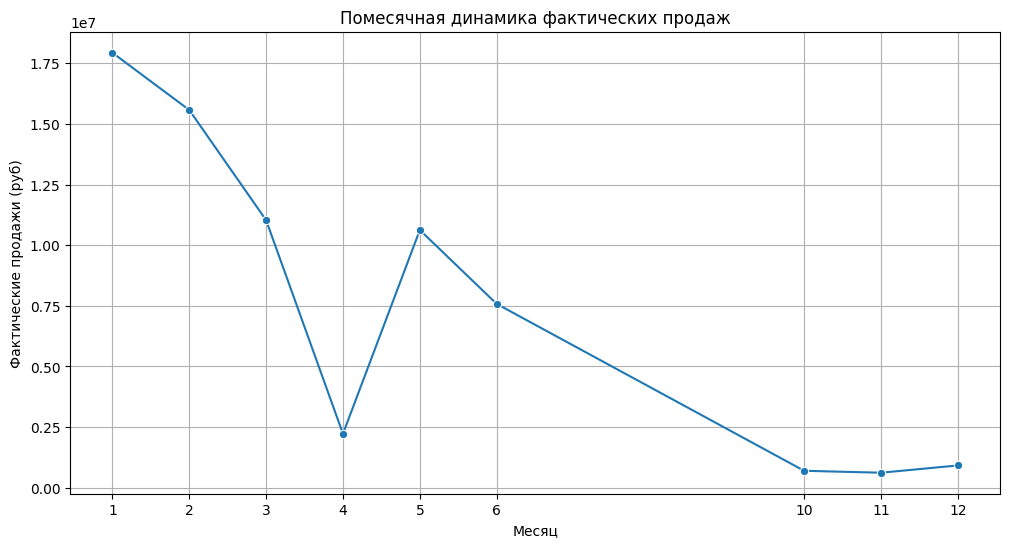

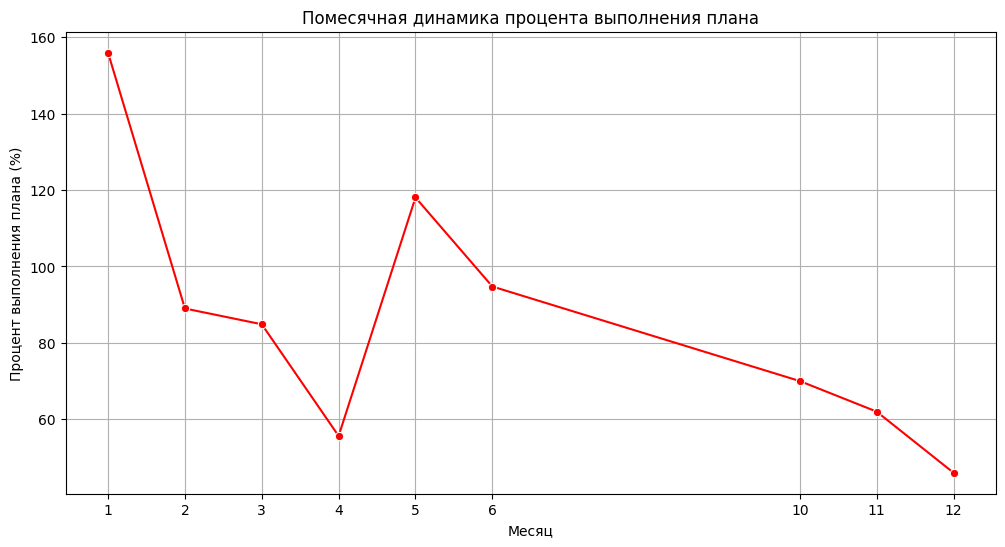

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

monthly_sales_dynamics = filtered_data.groupby('deal_month').agg(
    sales_fact_rub=('sales_fact_rub', 'sum'),
    sales_plan_rub=('sales_plan_rub', 'sum')
).reset_index()

monthly_sales_dynamics['monthly_plan_fulfillment_percentage'] = (monthly_sales_dynamics['sales_fact_rub'] / monthly_sales_dynamics['sales_plan_rub']) * 100

print("\nПомесячная динамика продаж:\n")
print(monthly_sales_dynamics)

plt.figure(figsize=(12, 6))
sns.lineplot(x='deal_month', y='sales_fact_rub', data=monthly_sales_dynamics, marker='o')
plt.title('Помесячная динамика фактических продаж')
plt.xlabel('Месяц')
plt.ylabel('Фактические продажи (руб)')
plt.xticks(monthly_sales_dynamics['deal_month'])
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='deal_month', y='monthly_plan_fulfillment_percentage', data=monthly_sales_dynamics, marker='o', color='red')
plt.title('Помесячная динамика процента выполнения плана')
plt.xlabel('Месяц')
plt.ylabel('Процент выполнения плана (%)')
plt.xticks(monthly_sales_dynamics['deal_month'])
plt.grid(True)
plt.show()

## Анализ географии продаж

Сгруппируем продажи по городам и рассчитем общие фактические продажи для каждого города, чтобы определить самые доходные регионы.


In [24]:
city_sales_analysis = filtered_data.groupby('city')['sales_fact_rub'].sum().sort_values(ascending=False)
print("\nОбщие фактические продажи по городам (отсортированные по убыванию):\n")
print(city_sales_analysis)


Общие фактические продажи по городам (отсортированные по убыванию):

city
Челябинск          8700000
Казань             8040000
Магнитогорск       7680000
Сочи               6950000
Новосибирск        5725000
Самара             5574000
Уфа                4350000
Волгоград          4250000
Москва             3717000
Оренбург           2750000
Тула               1850000
Нижний Новгород    1635000
Кемерово           1500000
Санкт-Петербург    1370000
Улан-Удэ            970000
Пермь               770000
Курск               700000
Саратов             430000
Омск                250000
Name: sales_fact_rub, dtype: int64


## Анализ влияния каналов продаж

Оценим, как каналы продаж влияют на выполнение плана (сравнение фактических и плановых продаж по каналам), конверсию (если есть возможность оценить из статусов сделок) и среднюю длительность сделки (используя столбец 'days_deal_payment').


In [25]:
sales_channel_analysis = filtered_data.groupby('sales_channel').agg(
    sales_fact_rub=('sales_fact_rub', 'sum'),
    sales_plan_rub=('sales_plan_rub', 'sum')
).reset_index()

sales_channel_analysis['plan_fulfillment_percentage'] = (sales_channel_analysis['sales_fact_rub'] / sales_channel_analysis['sales_plan_rub']) * 100

print("Анализ выполнения плана по каналам продаж:\n")
print(sales_channel_analysis)

Анализ выполнения плана по каналам продаж:

         sales_channel  sales_fact_rub  sales_plan_rub  \
0              Вебсайт          800000         1000000   
1             Выставка        28644000        27500000   
2  Контекстная реклама         2450000         4500000   
3                Почта         1550000         3000000   
4         Рекомендация        18035000        13000000   
5      Холодный звонок        15732000        18000000   

   plan_fulfillment_percentage  
0                    80.000000  
1                   104.160000  
2                    54.444444  
3                    51.666667  
4                   138.730769  
5                    87.400000  


In [26]:
total_deals_per_channel = filtered_data.groupby('sales_channel').size().reset_index(name='total_deals')
closed_deals_per_channel = filtered_data[filtered_data['status'] == 'Закрыто'].groupby('sales_channel').size().reset_index(name='closed_deals')

conversion_analysis = pd.merge(total_deals_per_channel, closed_deals_per_channel, on='sales_channel', how='left')
conversion_analysis['closed_deals'] = conversion_analysis['closed_deals'].fillna(0) # Fill NaN for channels with no closed deals
conversion_analysis['conversion_percentage'] = (conversion_analysis['closed_deals'] / conversion_analysis['total_deals']) * 100

sales_channel_analysis = pd.merge(sales_channel_analysis, conversion_analysis[['sales_channel', 'conversion_percentage']], on='sales_channel', how='left')

print("Анализ конверсии по каналам продаж (обновлено):")
print(sales_channel_analysis)

Анализ конверсии по каналам продаж (обновлено):
         sales_channel  sales_fact_rub  sales_plan_rub  \
0              Вебсайт          800000         1000000   
1             Выставка        28644000        27500000   
2  Контекстная реклама         2450000         4500000   
3                Почта         1550000         3000000   
4         Рекомендация        18035000        13000000   
5      Холодный звонок        15732000        18000000   

   plan_fulfillment_percentage  conversion_percentage  
0                    80.000000                  100.0  
1                   104.160000                  100.0  
2                    54.444444                  100.0  
3                    51.666667                  100.0  
4                   138.730769                  100.0  
5                    87.400000                  100.0  


In [27]:
average_deal_duration = filtered_data.groupby('sales_channel')['days_deal_payment'].mean().reset_index(name='average_deal_duration')

sales_channel_analysis = pd.merge(sales_channel_analysis, average_deal_duration, on='sales_channel', how='left')

print("Анализ влияния каналов продаж (обновлено с длительностью сделки):")
print(sales_channel_analysis)

Анализ влияния каналов продаж (обновлено с длительностью сделки):
         sales_channel  sales_fact_rub  sales_plan_rub  \
0              Вебсайт          800000         1000000   
1             Выставка        28644000        27500000   
2  Контекстная реклама         2450000         4500000   
3                Почта         1550000         3000000   
4         Рекомендация        18035000        13000000   
5      Холодный звонок        15732000        18000000   

   plan_fulfillment_percentage  conversion_percentage  average_deal_duration  
0                    80.000000                  100.0              20.000000  
1                   104.160000                  100.0               9.214286  
2                    54.444444                  100.0              29.800000  
3                    51.666667                  100.0              57.000000  
4                   138.730769                  100.0              26.440000  
5                    87.400000                  100.0

In [28]:
sales_channel_analysis_sorted = sales_channel_analysis.sort_values(by='plan_fulfillment_percentage', ascending=False)
print("\nПолный анализ влияния каналов продаж (отсортированный по проценту выполнения плана):\n")
print(sales_channel_analysis_sorted)


Полный анализ влияния каналов продаж (отсортированный по проценту выполнения плана):

         sales_channel  sales_fact_rub  sales_plan_rub  \
4         Рекомендация        18035000        13000000   
1             Выставка        28644000        27500000   
5      Холодный звонок        15732000        18000000   
0              Вебсайт          800000         1000000   
2  Контекстная реклама         2450000         4500000   
3                Почта         1550000         3000000   

   plan_fulfillment_percentage  conversion_percentage  average_deal_duration  
4                   138.730769                  100.0              26.440000  
1                   104.160000                  100.0               9.214286  
5                    87.400000                  100.0              44.033333  
0                    80.000000                  100.0              20.000000  
2                    54.444444                  100.0              29.800000  
3                    51.666667  

## Анализ спроса на товарные категории

Определим популярность товарных категорий по числу уникальных клиентов и по объему фактических продаж.


In [29]:
product_popularity = filtered_data.groupby('product_segment').agg(
    unique_clients=('seller', 'nunique'),
    total_sales_rub=('sales_fact_rub', 'sum')
).reset_index()

print("Популярность товарных категорий по числу клиентов и объему продаж:")
print(product_popularity.head())

Популярность товарных категорий по числу клиентов и объему продаж:
  product_segment  unique_clients  total_sales_rub
0    Автозапчасти               1           700000
1         Бассейн               1          1500000
2          Другое               4          7225000
3         Игрушки               1           250000
4       Косметика               1           200000


In [30]:
product_popularity_sorted = product_popularity.sort_values(by=['unique_clients', 'total_sales_rub'], ascending=False).reset_index(drop=True)
print("\nПопулярность товарных категорий (отсортировано по числу клиентов и продажам):\n")
print(product_popularity_sorted)


Популярность товарных категорий (отсортировано по числу клиентов и продажам):

           product_segment  unique_clients  total_sales_rub
0             Оборудование               7         35099000
1                   Другое               4          7225000
2       Ткань и аксессуары               4          5712000
3   Электронные устройства               4          2130000
4                   Одежда               3          4650000
5                     Свет               1          6950000
6                  Бассейн               1          1500000
7                 Сувениры               1           970000
8             Спорт товары               1           750000
9             Автозапчасти               1           700000
10                Упаковка               1           675000
11                Медецина               1           400000
12                 Игрушки               1           250000
13               Косметика               1           200000


# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

**Какие менеджеры являются лучшими и наихудшими с точки зрения выполнения плана?**

**Самые эффективные менеджеры:**

* А. Рейтинг: 126,36\% выполнения

* М. Бейли: 111,73% удовлетворенности

* Р. Хайерс: 101,45% удовлетворенности

**Худшие менеджеры:**

* Т. Ли: выполнение на 56,67%

* С. Милер: выполнение на 64,57%

* А. Перри: выполнение на 65,00%

### Основные выводы из анализа данных

**Эффективность работы менеджера:**

* Три менеджера (А. Остер, М. Бейли, Р. Хайерс) перевыполнили свои планы по продажам, при этом А. Остер добился наивысшего показателя выполнения - 126,36%.

* Три менеджера (Т. Ли, С. Милер, А. Перри) показали значительно более низкие результаты, при этом у Т. Li самый низкий показатель выполнения плана - 56,67%.

**Динамика продаж по месяцам:**

* Январь показал самые высокие показатели фактических продаж и выполнения плана - 15 574 000 рублей и 155,96% соответственно.

* В апреле были зафиксированы самые низкие фактические продажи - 2 225 000 рублей и самое низкое выполнение плана - 55,63%.

* Продажи и выполнение плана значительно снизились с февраля (88,99%) по март (84,86%) до конца года, при этом в декабре было зафиксировано самое низкое выполнение - 46,00%.

**География продаж:**

* Челябинск стал городом с самыми высокими показателями - объем фактических продаж составил 8 700 000 рублей.

* Казань (8 040 000 рублей) и Магнитогорск (7 680 000 рублей) также были регионами с высокими показателями.

* В Омске были зафиксированы самые низкие фактические продажи - 250 000 рублей.

**Влияние канала продаж:**

Выполнение плана: Канал "Рекомендация" (Recommendation) значительно перевыполнил свой план на 138,73%, за ним следует "Выставка" (Exhibition) на 104,16%. "Почта" и "Контекстная реклама" были самыми низкими - 51,67% и 54,44% соответственно.

Конверсия: Конверсия по всем каналам продаж составила 100% (сделки помечены как "Закрыто").

**Средняя продолжительность сделки:** У "Выставки" было самое быстрое закрытие сделки - примерно 9,21 дня, в то время как у "Счета" была самая продолжительная средняя продолжительность - 57 дней. "Холодный звонок" (Cold calling) также был относительно продолжительным - 44,03 дня.

**Спрос в категории продуктов:**

* "Оборудование" - самая популярная товарная категория с 7 уникальными клиентами и фактическим объемом продаж в 35 099 000 рублей.

* За ним последовало "Другое" с 4 уникальными клиентами и объемом продаж в 7 225 000 рублей.